In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def forward(self, inputs):
    y_pred = torch.mm(inputs.view(1, -1), self.weights.view(-1, 1)) + self.bias
    return y_pred.squeeze()

inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

neuron = Neuron(weights, bias)
neuron.forward(inputs)

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
neuron = Neuron(weights, bias)
neuron.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.


In [ ]:
class Linear:
  def __init__(self, weights, biases):
    self.w = weights
    self.bs = biases

  def forward(self, inputs):
      return  torch.mm(inputs.view(1, -1), self.w.T) + self.bs


In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

l1 = Linear(weights, biases)
l1.forward(inputs)

tensor([[ 4.8400,  0.1700, 10.3900]])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
class Linear2:
  def __init__(self, n_neurons):
    self.n_neurons = n_neurons

  def forward(self, inputs):
    w = torch.randn(self.n_neurons, inputs.size()[1])
    return torch.mm(inputs, w.T)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

l2 = Linear2(2)
l2.forward(inputs)

tensor([[-8.1114e+00, -1.2768e+00],
        [ 3.6979e-04,  4.6392e+00],
        [-5.6352e+00,  3.8105e+00]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_neurons, n_features)

  def forward(self, inputs):
    return torch.mm(inputs, self.weights.T)

In [ ]:
l3 = Linear(100, 10)

batch_size = 5
inputs = torch.randn(batch_size, 100)
l3.forward(inputs)

tensor([[  7.1904,   2.7768, -10.1572,  -4.2104,   2.8090, -10.5604,   0.5336,
          -8.0462,   2.4465,  12.5588],
        [  4.5975,  -5.1544, -12.8109,  -2.9165,  -4.2865,   8.3170,   9.1937,
         -15.5200, -18.9204, -14.2563],
        [ -4.7673,  -0.7815,  -6.3147,   1.5352,  -0.8508,   6.1400, -12.5935,
          -7.1374,  -3.7861,   2.9937],
        [-11.6078,  -1.9039,  -5.1928, -12.2185,   2.9382,  15.1718,   4.8417,
          13.1576,  -2.0130,   0.1568],
        [  2.9620, -10.5900,  -7.8903,   4.8808,   1.3992,  -9.0854, -15.3596,
          -1.0898,  -0.9856, -13.0186]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

count_neurons_1 = 5
count_neurons_2 = 7

predict_matrix = Linear(n_features=count_neurons_1, n_neurons=count_neurons_2
                        ).forward(Linear(n_features=4, n_neurons=count_neurons_1
                                         ).forward(inputs))
predict_matrix

tensor([[  7.1718,  -0.1074,  -3.8725,  -7.5632, -10.3880,  -6.0989,  -8.0704],
        [  5.0445,   0.7275,  11.8852,  33.0467,  -2.3483,   5.9672,  -3.6995],
        [  5.8698,   1.9376,  -6.8140,  -2.0908, -12.8554,  -3.1930,  -9.2284]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ReLU:
  def forward(self, inputs):
    return torch.where(inputs >=0, inputs, 0)

In [ ]:
matrix = torch.randn(4, 3)

relu = ReLU()
result = relu.forward(matrix)
result

tensor([[1.3549, 0.2620, 0.0000],
        [0.0000, 0.7398, 0.0000],
        [0.0000, 0.2438, 0.0000],
        [2.1602, 0.0000, 1.3061]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
class Softmax:

  def forward(self, inputs):
    exponentials = torch.exp(inputs)
    sum_exponentials = torch.sum(exponentials, dim=1, keepdim=True)
    return exponentials / sum_exponentials

In [ ]:
matrix = torch.randn(4, 3)
softmax = Softmax()
result = softmax.forward(matrix)
result

tensor([[0.1463, 0.3979, 0.4558],
        [0.4419, 0.4240, 0.1342],
        [0.1461, 0.3443, 0.5096],
        [0.1544, 0.4358, 0.4098]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha

  def forward(self, inputs):
    return torch.where(inputs >=0, inputs, self.alpha*(torch.exp(inputs)-1))

In [ ]:
matrix = torch.randn(4, 3)
elu = ELU(0.5)
result = elu.forward(matrix)
result

tensor([[-0.2842,  1.9840,  0.0854],
        [ 0.5865, -0.2104,  1.7136],
        [ 2.0786,  1.3240,  0.1427],
        [-0.0564, -0.1551,  0.9721]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class Linear:
  def forward(self, inputs, y_true):
    w = torch.rand(1, inputs.size()[1])
    output = torch.mm(inputs, w.T)
    return self.mseLoss(output, y_true)

  def mseLoss(self, y_pred, y_true):
    return 1/y_true.size()[0] * torch.sum((y_true.view(-1, 1)-y_pred)**2)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

l = Linear()
l.forward(inputs, y)

tensor(0.0029)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
tensor = torch.tensor([[1, 2], [1, 2]])
tensor = tensor*torch.log(tensor)
display(tensor)
-torch.sum(tensor)

tensor([[0.0000, 1.3863],
        [0.0000, 1.3863]])

tensor(-2.7726)

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class Linear:
  def forward(self, inputs, y_true, alpha):
    self.w = torch.rand(1, inputs.size()[1])
    output = torch.mm(inputs, self.w.T)
    return self.mseLoss(alpha, output, y_true)

  def mseLoss(self, alpha, y_pred, y_true):
    return 1/y_true.size()[0] * torch.sum(y_true.view(-1, 1)-y_pred)**2 + alpha*torch.sum(torch.pow(self.w, 2))

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

l = Linear()
l.forward(inputs, y, 0.001)

tensor(0.3385)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
import torch

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)
X[0], y[0]

(tensor([-0.3452,  1.7192, -1.1834,  0.7130]), tensor(127.5963))

In [ ]:
class Neuron:

  def __init__(self, n_neurons, n_features):
    self.weights = torch.randn(n_neurons, n_features)
    self.bias = torch.randn(1)[0]

  def forward(self, X, y):
    predict = torch.mm(X, self.weights.T) + self.bias
    self.backword(X, y, predict.squeeze())

  def backword(self, X, y, predict, alpha=0.00005):
    self.bias -= torch.sum(alpha*(2*(y-predict))*(-1))
    self.weights -= alpha*torch.sum(torch.mul(2*(y-predict), X.T), dim=1)

  def predict(self, X):
    return torch.mm(X, self.weights.T) + self.bias

  def mseLoss(self, y_pred, y_true):
    return 1/y_true.size()[0] * torch.sum(y_true.view(-1, 1)-y_pred)**2

In [ ]:
neuron = Neuron(1, X.size()[1])

neuron.forward(X, y)
y_pred = neuron.predict(X)

print(neuron.mseLoss(y_pred, y))

tensor(139.8155)


[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return (y_true-y_pred)**2

  def backward(self, y_pred, y_true):
    return (-2*(y_true-y_pred)).squeeze()


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(1, n_inputs)
    self.bias = torch.randn(1)[0]

  def forward(self, inputs):
    return torch.mm(inputs, self.weights.T) + self.bias

  def backward(self, inputs, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dbias = dvalue
    self.dweights = dvalue * inputs


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = X.size()[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example.view(1, -1))
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)

    # backprop
    neuron.backward(x_example, loss.backward(y_pred, y_example))

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.bias -= learning_rate * neuron.dbias
    neuron.weights -= learning_rate * neuron.dweights

In [ ]:
losses[-5:-1]

[tensor([[2.3283e-10]]),
 tensor([[1.4552e-11]]),
 tensor([[5.8208e-11]]),
 tensor([[0.]])]

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return 1/y_true.size()[0] * torch.sum((y_true.view(-1, 1)-y_pred)**2)

  def backward(self, y_pred, y_true):
    self.dinput = -2/y_true.size()[0]*(y_true.view(-1, 1)-y_pred)


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(1, n_inputs)
    self.bias = torch.randn(1)[0]

  def forward(self, inputs):
    return torch.mm(inputs, self.weights.T) + self.bias

  def backward(self, inputs, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = torch.mm(dvalue.T, inputs)
    self.dbias = torch.sum(dvalue)


2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.size()[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backprop
    loss.backward(y_pred, y)
    neuron.backward(X, loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.bias -= learning_rate * neuron.dbias
    neuron.weights -= learning_rate * neuron.dweights

In [ ]:
losses[-1]

tensor(2.5535e-10)

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

In [ ]:
n_inputs = X.size()[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backprop
    loss.backward(y_pred, y)
    neuron.backward(X, loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.bias -= learning_rate * neuron.dbias
    neuron.weights -= learning_rate * neuron.dweights

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
losses[0], losses[-1]

(tensor(9903.6807), tensor(3.6052e-10))

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_neurons, n_features)
    self.biases = torch.randn(1, n_neurons)

  def forward(self, inputs):
    return torch.mm(inputs, self.weights.T) + self.biases

  def backward(self, inputs, dvalues):
    self.dweights = torch.mm(inputs.T, dvalues)
    self.dbiases = torch.mm(torch.ones(1, dvalues.size()[0]), dvalues)
    self.dinputs = torch.mm(dvalues, self.weights.T)

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
X.size(), y.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return 1/y_true.size()[0] * torch.sum((y_true.view(-1, 1)-y_pred)**2)

  def backward(self, y_pred, y_true):
    self.dinput = -2/y_true.size()[0]*(y_true.view(-1, 1)-y_pred)


class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0


class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_neurons, n_features)
    self.biases = torch.randn(1, n_neurons)

  def forward(self, inputs):
    return torch.mm(inputs, self.weights.T) + self.biases

  def backward(self, inputs, dvalues):
    self.dweights = torch.mm(dvalues.T, inputs)
    self.dbiases = torch.mm(torch.ones(1, dvalues.size()[0]), dvalues)
    self.dinputs = torch.mm(dvalues, self.weights)

In [ ]:
# создание компонентов сети
fc1 = Linear(X.size()[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  # <forward pass>
  first = fc1.forward(X)
  second = relu1.forward(first)
  output = fc2.forward(second)

  data_loss = loss.forward(output, y)

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(output)

  # <backprop>
  loss.backward(output, y)

  fc2.backward(second, loss.dinput)
  # <шаг оптимизации для fc2>
  fc2.biases -= lr * fc2.dbiases
  fc2.weights -= lr * fc2.dweights

  relu1.backward(fc2.dinputs)

  fc1.backward(X, relu1.dinputs)
  # <шаг оптимизации для fc1>
  fc1.biases -= lr * fc1.dbiases
  fc1.weights -= lr * fc1.dweights

epoch 0 mean loss 0.6350867748260498
epoch 200 mean loss 0.028697246685624123
epoch 400 mean loss 0.014942532405257225
epoch 600 mean loss 0.009522625245153904
epoch 800 mean loss 0.0076479678973555565
epoch 1000 mean loss 0.0069420901127159595
epoch 1200 mean loss 0.006594806909561157
epoch 1400 mean loss 0.006397943943738937
epoch 1600 mean loss 0.006229116581380367
epoch 1800 mean loss 0.006090296898037195
epoch 2000 mean loss 0.005988632794469595


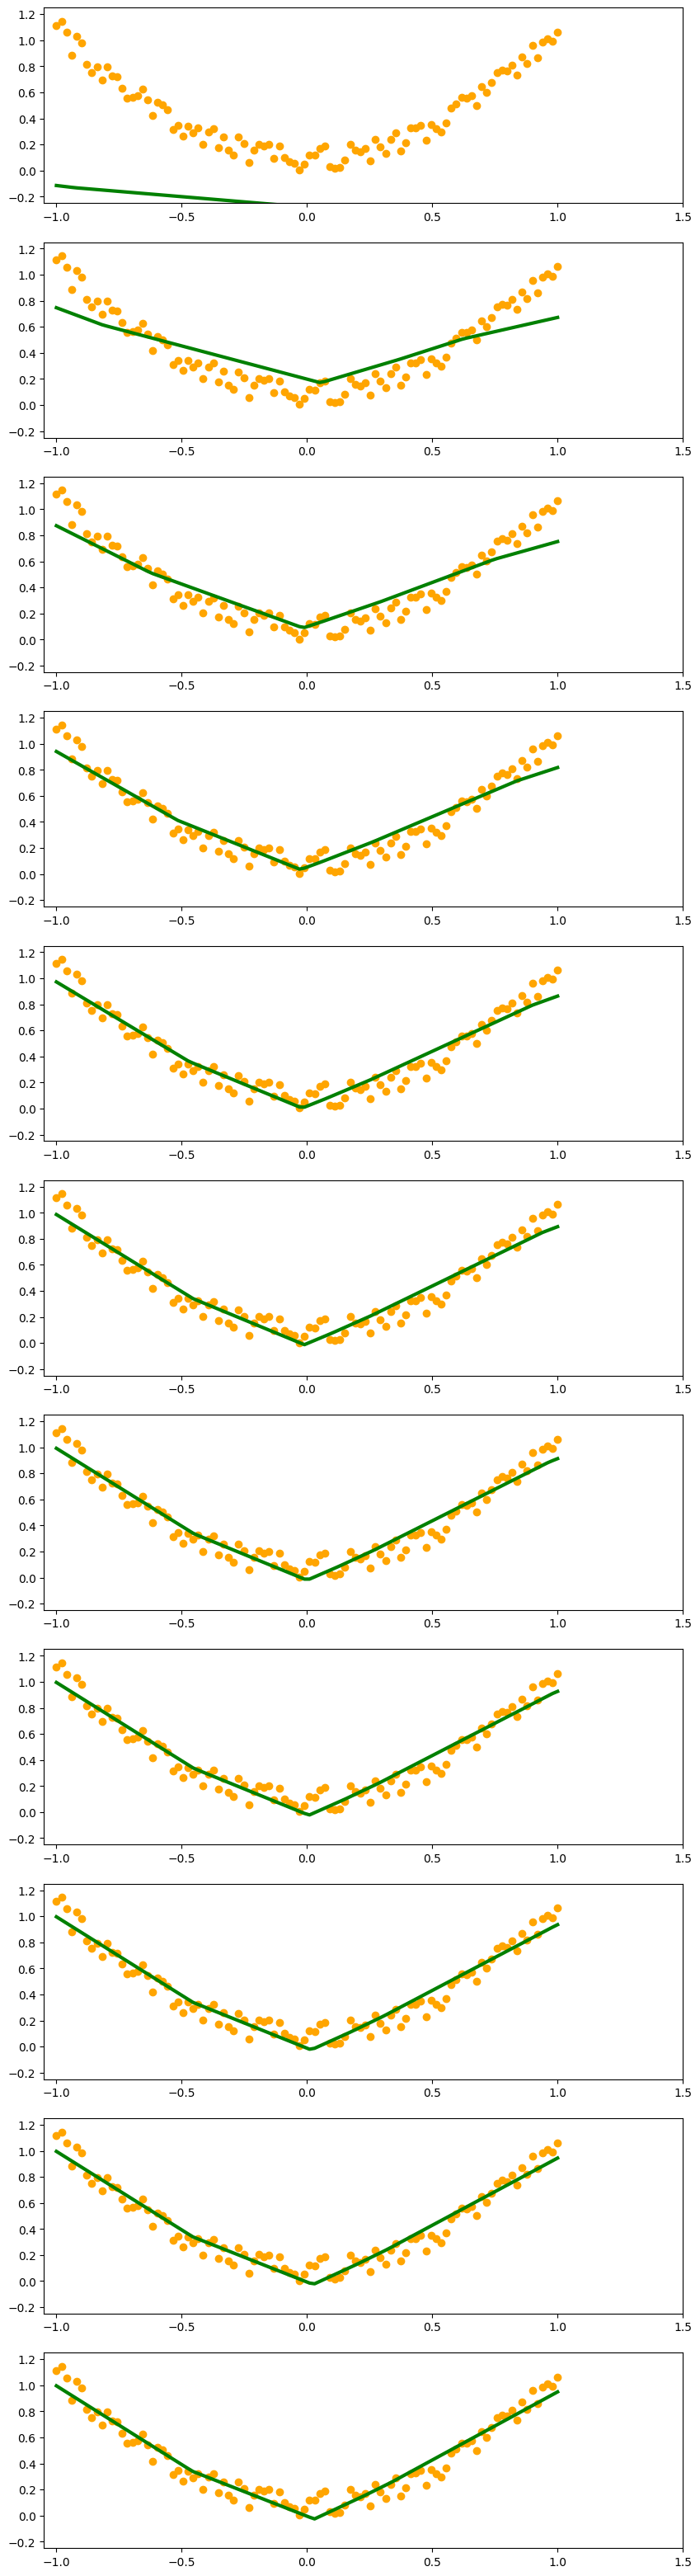

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)